<h1  style="color:#03363D">Plan Upgrade Prediction Model</h1>
<p  style="color:#03363D">by Sarah Kay: [skay@zendesk.com](mailto:skay@zendesk.com)</p>


<h3 style="color:#03363D">Project Problem and Hypothesis</h3>

I would like to identify the relationship between product feature usage in the core Zendesk Support product and plan upgrades amongst paying customers. The idea is to identify patterns of behavior that signify upgrade and to then use that information to drive more upgrades, as well as increase product adoption of features that indicate upgrade is likely. 

This is a classification issue, with the predicted outcome of a binary 'yes' or 'no' that a customer is likely to upgrade to a higher plan. I hypothesize that some feature will be more indicative than others, particularly the behavior ratios I plan on creating to compare month over month behavior of customers in relation to themselves. This will likely tell us if people are ramping up or down, the assumption being that ramping up will lead to upgrade.

<h3 style="color:#03363D">Dataset</h3>

All data is coming from our internal Product Data Warehouse through the following SQL queries:</p>
- [upgraded](https://gist.github.com/zendeskskay/ce4e13f187d6ca6c101626744b930075) (snapshot)
- [not_upgraded](https://gist.github.com/zendeskskay/c36c130d873180c322aed222b93df3e4) (snapshot)
- [upgraded_customer_months](https://gist.github.com/zendeskskay/7161e6e7593509a9410f4c0e7eee264c) (month over month)
- [not_upgraded_customer_months](https://gist.github.com/zendeskskay/ef9d54d0704d6ce13998c3ce5fabf42b) (month over month)

<h4>Feature Descriptions:</h4>
- `upgraded_boolean`: the value we are trying to predict (1 = upgraded, 0 = not upgraded)

<h5>Account level metrics used for doing exploratory analysis</h5>
- `account_id`: unique customer identifier
- `year_month_won`: month/year combinition that the customer started paying
- `age_in_months`: age of each account in months at the time of observation
- `pre_upgrade_plan`: plan the customer was on at the time of upgrade (converted into dummies for the model)

<h5>All `num_` features are continuous numeric variables</h5>
- `num_agents`: count of seats purchased by the customer
- `num_trig`: count of triggers, which fire specific actions when certain conditions are met (if, else, then)
- `num_automations`: count of automations, like triggers, but time based
- `num_tags`: count of tags applied across tickets, users and organizations
- `num_macros`: count of macros, or snippets of saved text that can be applied to tickets
- `num_groups`: count of total groups that agents can be assigned to
- `num_orgs`: count of total organizations that end users can belong to
- `num_fields`: count of custom fields on tickets
- `num_apps`: Apps are external applications that can be installed to extend the functionality of Support
- `num_tix_solved`: Tickets are the core of Zendesk and most accounts solve some number of these each month

<h5>All `enabled_` features are binary, 1 for on, 0 for off</h5>
- `enabled_HC`: Help Center is a content management system that let's customers self serve answers to common questions
- `enabled_redaction`: Redaction is a feature that let's you remove sensitive info like credit card #s
- `enabled_insights`: Insights is the integrated BI tool
- `enabled_talk`: Talk is the voice over IP feature
- `enabled_widget`: Web Widget is a feature that allows other Support features to be embedded in customer's websites
- `enabled_csat`: Customer Satisfaction Surveys allow users of our product to survey their end-users
- `enabled_hours`: Hours are business hours, which allow you to calculate metrics and set up triggers/automations in a way that considers your company's working hours (excluding holidays or weekends or whatever hours you're not 'open')
- `enabled_slas`: SLAs are Service Level Agreements, they allow you to set rules to manage the ticket queues more effectively for various customer groupings
- `enabled_HCcode`: Help Center Code is the use of HTML, CSS, and JavaScript to design a unique Help Center look and feel
- `enabled_community`: Community is the section of a Help Center where end user can post questions and feedback

<h5>Dummy variables, calculated from the `pre_upgrade_plan` feature</h5>
- `Essential`, `Plus`, `Professional`, `Regular`, `Starter`, `Team`

<h3 style="color:#03363D">Domain Knowledge</h3>

I've worked at Zendesk for 3.25 yrs. Started in Support and moved to being an analyst 2yrs ago. I have a  lot of experience with how the product works, with our data infrastructure and with our business goals. This experience can help me to ensure the data is clean and to know when something looks off. It can help inform decisions about what features to include and which to throw out as well as which new features to engineer.

Unfortunately, there is not a lot of public research around upgrade models, particularly because the use cases almost always involve proprietary data. Not a lot of public data (i.e. government data, health data, etc) is used to predict upgrades in a similar way. Internally, however we do have some data scienctists working on building models to predict churn and they have been very kind in advising me about my model. I also had a call with a data scientist at my boss's husband's company. He was very helpful in recommending that I use customer/month combinations as unique observations to help deal with the issue of time.

<h3 style="color:#03363D">Project Concerns</h3>

Some questions I still have are around how to handle the concept of time and age with regards to various accounts. I tried segmenting my data by cohort (looking at a group of accounts won in the same month/year) to make sure they were all the same age and subject to the same influences of time around the same periods of their account maturity, but this made my dataset too small. Instead we decided to go with the individual observations for each customer month/year combination, but this makes the balance of those that upgrade vs those that don't even more extreme. The first time I ran my model this was apparent as I had a 97% accuracy score, because the model was always predicting not upgrade. I added in `class_weight='balanced'` which seems to have helped. 

I had to make sure I was comparing apples to apples by limiting the dataset to accounts won in the same year, which will prevent me from noticing if there are any trends around upgrading at the 1 year renewal mark. I'm only looking at Upgrades that took place between 01/01/2016 and 11/30/2016, hopefully I can get my hands on more data in the future.

It would help my model to know if customers were touched by marketing campaigns, sales calls, or other events that could influence their behavior.

I also would love to include data from outside my company's purview, including economic data, stock market data, company size, and other things that could help us to know which companies are growing and would likely buy more product.

The cost of my model being wrong is potentially misdirected sales and marketing campaigns, which could annoy current customers and potentially increase churn in a worst case scenario (which is kind of how we do marketing campaigns now). The benefit could be more upsell success and more revenue for the company.

There is also the potential for some of the data to be incorrect, but the likelihood is low given that we are pulling usage data directly from our production databases.  

<h3 style="color:#03363D">Outcomes</h3>

My target audience is expecting something that resembles a product usage score, a 1-5 stating who are the low, medium and high users of the product. We have discussed the potential that product usage is not the only factor determining an upgrade and the there is a chance there are customers that have high usage and low probability to upgrade and visa versa. Hopefully we will be able to learn the correlation between the two after this model is built.

They believe from their initial analysis that there are 7 magic features that lead to upgrading:
1. Apps
2. SLAs
3. Help Center
4. Business Hours
5. Ticket Forms
6. CSat
7. Roles and Permissions

I believe this model will confirm some of those features and perhaps debunk others.

Any insight gained from this model would be considered a success, but we would love something that is pretty accurate so we can operationalize it. If the model is a complete bust, no harm no foul. We will continue to search for ways to use data to improve our business processes.

<h2 style="color:#03363D">Exploratory Analysis</h2>
<h3 style="color:#03363D">Import Libraries</h3>

In [142]:
import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="white")

import sklearn
from sklearn import preprocessing, linear_model, metrics, model_selection
from sklearn.model_selection import train_test_split

import statsmodels as sm

pd.set_option('display.max_columns', 500)

<h3 style="color:#03363D">Import Data</h3>

In [143]:
upgraded = pd.read_csv('upgraded2.csv')
not_upgraded = pd.read_csv('not_upgraded.csv')

In [144]:
# CHECK NULLS
print "UPGRADE NULLS"
print upgraded.isnull().sum()[upgraded.isnull().sum() >0] 

print "NON-UPGRADE NULLS"
print not_upgraded.isnull().sum()[not_upgraded.isnull().sum() >0]

UPGRADE NULLS
num_agents            250
mrr_pre_upgrade       175
mrr_post_upgrade       15
mrr_delta             189
num_trig              252
num_automations       252
num_tags              252
num_macros            252
num_groups            254
num_orgs              254
num_fields            254
enabled_redaction     427
enabled_insights     1973
enabled_talk          427
enabled_widget        427
enabled_csat          427
enabled_hours         427
enabled_slas          427
enabled_HCcode       1001
enabled_community    1140
num_tix_solved        259
dtype: int64
NON-UPGRADE NULLS
pre_upgrade_plan         2
num_agents               2
num_trig                 2
num_automations          2
num_tags                 2
num_macros               2
num_groups               2
num_orgs                 2
num_fields               2
enabled_redaction        2
enabled_insights     12675
enabled_talk             2
enabled_widget           2
enabled_csat             2
enabled_hours            2
enab

* All the features that are null are because they aren't using it and therefore have no record in that table in our database. 
* The nulls of concern to me were `num_agents` and `pre_upgrade_plan`, because *it is impossible to have an account and not have a plan type or at least 1 agent*. 
* I did some digging and these were all accounts that were less than 10 days old, and since I am pulling data 10 days prior to upgrade date (or end of period for those that didn't upgrade) those accounts just didn't exist yet on the date of the data pull. 
* This is fixed in my customer/month data set that is used for the actual model so I am less concerned with it for the initial EDA

In [145]:
#REPLACE NULLS WITH 0
upgraded_df = upgraded.fillna(0.)
not_upgraded_df = not_upgraded.fillna(0.)
df = pd.concat([upgraded_df,not_upgraded_df], axis=0, join='outer')

In [146]:
df.head()

,account_id,year_month_won,upgraded_boolean,age_in_months,pre_upgrade_plan,post_upgrade_plan,upgrade_levels,num_agents,mrr_pre_upgrade,mrr_post_upgrade,mrr_delta,num_trig,num_automations,num_tags,num_macros,num_groups,num_orgs,num_fields,enabled_HC,enabled_redaction,enabled_insights,enabled_talk,enabled_widget,enabled_csat,enabled_hours,enabled_slas,enabled_HCcode,enabled_community,num_apps,num_tix_solved
0,312069,201604,1,6,Team,Professional,1,4,76,76,0,13,6,2550,4,6,1,3,1,0,0,0,1,0,0,0,0,1,2,32
1,509860,201511,1,2,Plus,Enterprise,1,4,236,1250,1014,10,1,297,4,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0
2,528477,201603,1,8,Professional,Enterprise,1,4,236,236,0,10,5,5036,6,2,755,10,1,0,1,0,0,1,1,0,1,0,7,378
3,627758,201512,1,3,Essential,Professional,2,3,27,59,32,5,1,15,6,4,1,0,0,0,0,0,0,0,0,0,0,0,0,49
4,630417,201602,1,7,Essential,Professional,2,9,45,45,0,6,1,390,21,1,1,1,1,0,0,0,1,0,0,0,0,1,1,246


### Check the Base Upgrade Rate

In [147]:
total_accounts = round((len(not_upgraded_df) + len(upgraded_df)),0)
pct_upgraded = round(len(upgraded_df),0)/total_accounts

print "%s Upgrades" % len(upgraded_df)
print "%s Non Upgrade Accounts" % len(not_upgraded_df)
print "%s Total Accounts" % total_accounts
print (round((pct_upgraded *100),2)), "% of customers won between 11/01/2015 and 11/30/2016 upgraded in 2016."

2073 Upgrades
15085 Non Upgrade Accounts
17158.0 Total Accounts
12.08 % of customers won between 11/01/2015 and 11/30/2016 upgraded in 2016.


In [148]:
df.year_month_won.unique()

array([201604, 201511, 201603, 201512, 201602, 201601, 201606, 201605,
       201608, 201607, 201609, 201611, 201610])

### Drop all accounts with 0 tickets
*they're not using the product*

In [149]:
print "number of accounts with 0 tickets"
df[df.num_tix_solved == 0].groupby('upgraded_boolean')['account_id'].count()

number of accounts with 0 tickets


upgraded_boolean
0    3968
1     550
Name: account_id, dtype: int64

In [150]:
df = df[df.num_tix_solved > 0]

<span style="color:#37B8AF">**Recheck the Upgrade Percent after Dropping Unused Accounts**</span>

In [151]:
print df.groupby('upgraded_boolean').account_id.count()
print round(len(df[df.upgraded_boolean == 1])* 1./len(df), 3) * 100, "% upgraded"

upgraded_boolean
0    11117
1     1523
Name: account_id, dtype: int64
12.0 % upgraded


### Remove All Enterprise Plans 
*it's the highest plan, no upgrading*

In [152]:
df = df[(df.pre_upgrade_plan != 0) & (df.pre_upgrade_plan != 'Enterprise Elite') & (df.pre_upgrade_plan != 'Enterprise') & (df.pre_upgrade_plan != 'Enterprise (Legacy)')]

<span style="color:#37B8AF">**Recheck the Upgrade Percent after Removing Enterprise Accounts**</span>

In [153]:
print df.groupby('upgraded_boolean').account_id.count()
print round(len(df[df.upgraded_boolean == 1])* 1./len(df), 3) * 100, "% upgraded"

upgraded_boolean
0    10400
1     1523
Name: account_id, dtype: int64
12.8 % upgraded


### Drop `post_upgrade_plan` and `upgrade_levels`
*we won't know this about accounts we're trying to predict*

In [154]:
df = df.drop(['post_upgrade_plan','upgrade_levels','mrr_pre_upgrade','mrr_post_upgrade'], axis = 1)

<h3 style="color:#03363D">Graph Cumulative Upgrade % by Age in Months</h3>

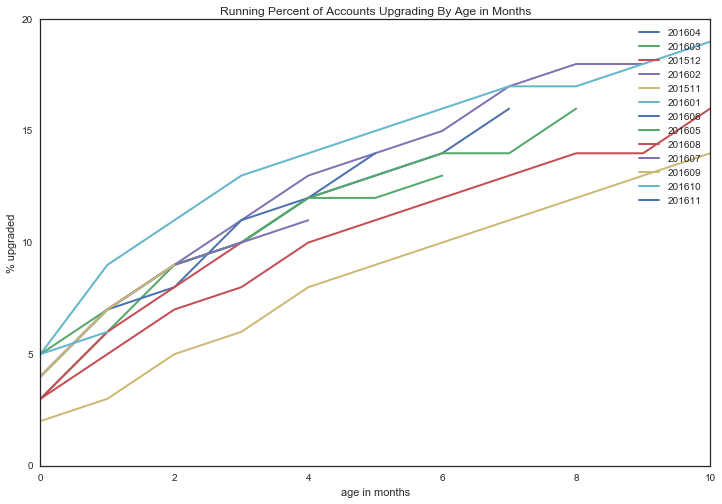

In [155]:
for i in df.year_month_won.unique():
    b = df[(df.upgraded_boolean == 1) & (df.year_month_won == i)].groupby('age_in_months')[['upgraded_boolean']].count()
    b.reset_index(level=0, inplace=True)
    b['running_upgrade_pct'] = ""
    a = len(df[df.year_month_won == i])
    c = len(df[df.year_month_won == i])
    for n in b.index:
        y = b[b.index == n].upgraded_boolean.values[0]
        a = a - y
        b.running_upgrade_pct.iloc[n] = 100 - round(a*1./c*100)
    ax = b.running_upgrade_pct.plot(kind = 'line', figsize = (12, 8), 
           title = 'Running Percent of Accounts Upgrading By Age in Months',
           linewidth = 2,
       )
    plt.ylim([0, 20])
    ax.set_xlabel("age in months")
    ax.set_ylabel("% upgraded")
    labels = df.year_month_won.unique()
    ax.legend(labels)

<h2 style="color:#03363D">Set Single Cohort to be Explored</h2>

In [156]:
w201601 = df[df.year_month_won  == 201601]
cohort = w201601

cohort_upgraded = cohort.query('upgraded_boolean == 1').fillna(0)
cohort_not_upgraded = cohort.query('upgraded_boolean == 0').fillna(0)

print len(cohort), "total accounts"
print len(cohort_upgraded), "upgraded"
print round(len(cohort_upgraded) * 1./len(cohort) * 1. * 100, 2), "% upgrade"

847 total accounts
158 upgraded
18.65 % upgrade


In [157]:
#REMOVE UNWANTED FEATURES 
features_to_remove = ['account_id', 'year_month_won','mrr_delta']
limited_features = cohort.drop(features_to_remove, axis = 1)

#CREATE LIST OF FEATURE NAMES
features = limited_features.columns.tolist()

#PASS LIST INTO A DATAFRAME FOR SORTING
v1 = pd.DataFrame(features) 

#CREATE TWO GROUPS: BINARY AND CONTINUOUS FOR COMPARING 
binary_features = v1[v1[0].str.contains("enabled")][0].tolist()
continuous_features = v1[v1[0].str.contains("num_")][0].tolist()
df[continuous_features] = df[continuous_features].astype('float')

<h2 style="color:#03363D">Distributions of Continuous Variables</h2>
<p>Looking at the distribution of all the continuous numeric variables accross the two cohorts, upgraded and non-upgraded can show us some variation in the behaviors between them.</p>

<h4 style="color:#37B8AF">NOT UPGRADED (0) vs UPGRADED (1):</h4>

In [158]:
cohort.groupby('upgraded_boolean')[continuous_features].describe().transpose().round()

0                                                1        \
                count   mean     std min 25%  50%   75%      max count  mean   
num_agents        689      5       8   1   1    3     6      138   158     4   
num_trig          689     10      16   0   6    7     9      349   158     6   
num_automations   689      2       2   0   1    1     2       22   158     1   
num_tags          689  12175  166287   0   7  146  1233  4263938   158  1544   
num_macros        689     12      22   0   4    4     9      232   158     8   
num_groups        689      3       3   1   1    1     3       32   158     2   
num_orgs          689     71     579   0   1    1     3    10481   158   118   
num_fields        689      3       7   0   0    0     3      102   158     3   
num_apps          689      2       2   0   0    1     2       20   158     1   
num_tix_solved    689   4854   44050   1  31  163   872  1035805   158   575   

                                               
                  std min 25% 50%  75%    max  
num_agents          4   0   1   2    5     29  
num_trig            5   0   5   6    7     57  
num_automations     1   0   1   1    1     11  
num_tags         8692   0   2  14  231  76046  
num_macros         22   0   4   4    5    242  
num_groups          3   0   1   1    2     22  
num_orgs         1073   0   1   1    2  13093  
num_fields         15   0   0   0    2    184  
num_apps            2   0   0   0    1      9  
num_tix_solved   2121   1  11  42  176  15144

<h2 style="color:#03363D">One-Way ANOVA</h2>

<span style="color:#37B8AF">**Do any of the group means differ from one another in any statistically significant way?**</span>

<p>The one-way ANOVA tests the significance of the variation between groups (in this case the upgraded vs non-upgraded accounts).</p>

<span style="color:#B20000">*p-value <= 0.05 is considered significant*</span>

**Making the significant variables:**
- num_apps		
- num_trig
- num_agents
- num_groups
- num_automations
- num_macros

In [159]:
# compute one-way ANOVA P value 
anova = pd.DataFrame(index = [0,1])

for feature in continuous_features:
     anova[feature] = stats.f_oneway(cohort_upgraded[feature],cohort_not_upgraded[feature]) 

anova = anova.transpose().round(5)
anova.columns = ['F-stat','P-value']
anova.sort_values(by='P-value',ascending=True)

,F-stat,P-value
num_apps,7.06973,0.00799
num_trig,6.49291,0.01101
num_agents,5.65134,0.01766
num_groups,5.48228,0.01944
num_automations,4.27787,0.03892
num_macros,4.11029,0.04294
num_tix_solved,1.48855,0.22278
num_tags,0.64482,0.42220
num_orgs,0.57945,0.44674
num_fields,0.07550,0.78356


<h2 style="color:#03363D">Histograms of the Continuous Variables</h2>

<span style="color:#37B8AF">**We can see that most of these variables have long right tails and will need to be transformed before building the model**</span>


**Comparing the distributions for non-upgrade (0) vs upgrade (1)**

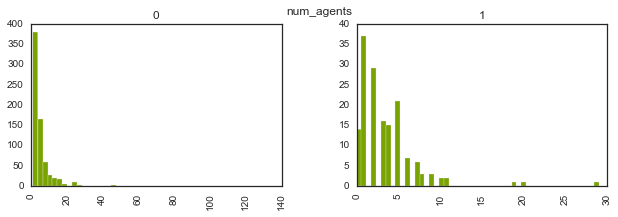

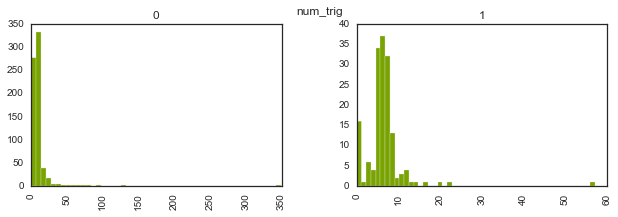

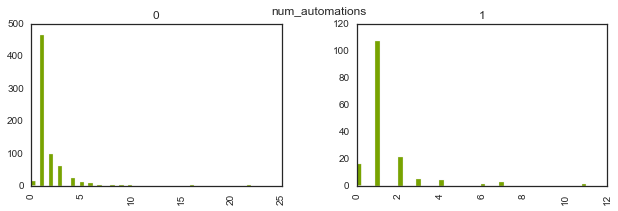

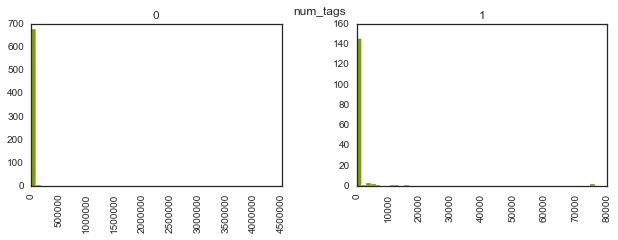

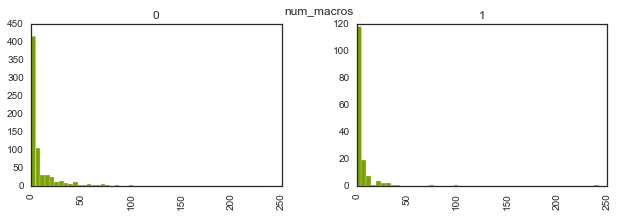

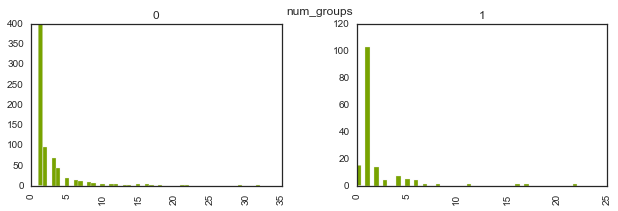

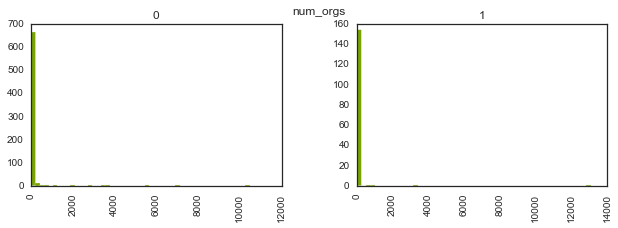

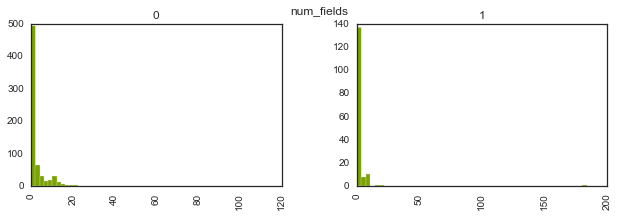

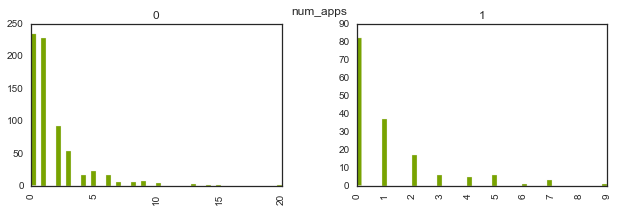

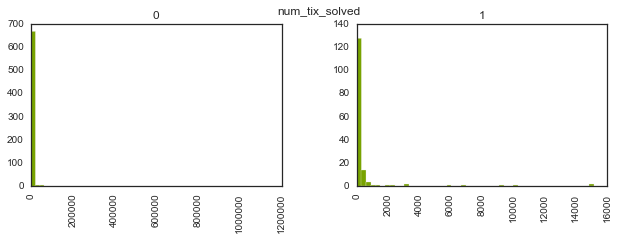

In [160]:
import pylab as pl

for x in continuous_features:
    cohort[x].hist(by=cohort.upgraded_boolean, color='#78A300', bins=50, figsize = (10, 3))
    pl.suptitle(x)

**Comparing the distributions across plan types**

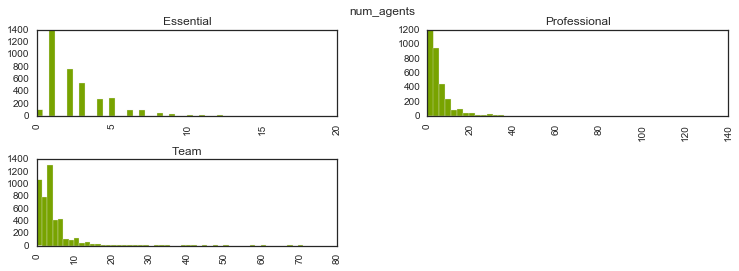

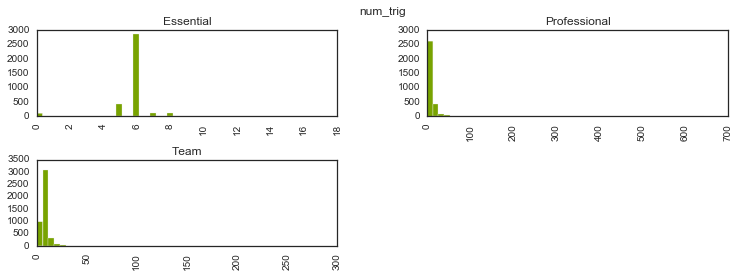

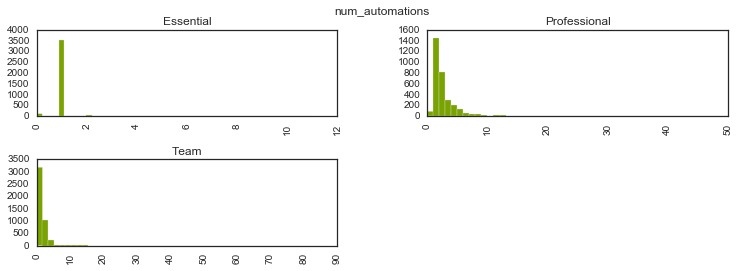

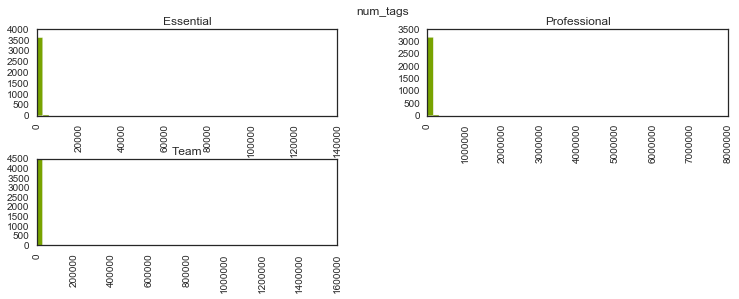

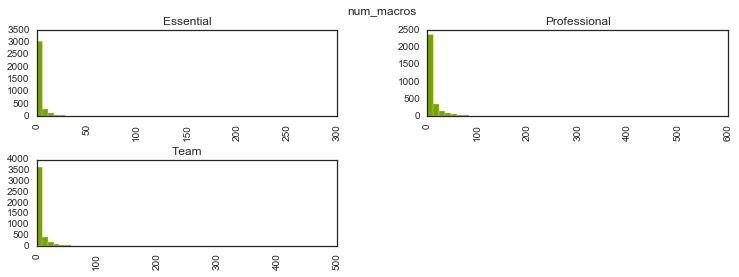

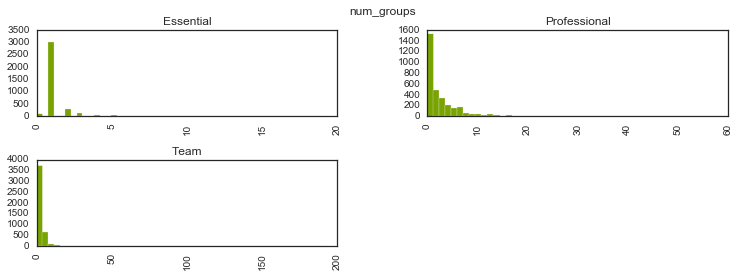

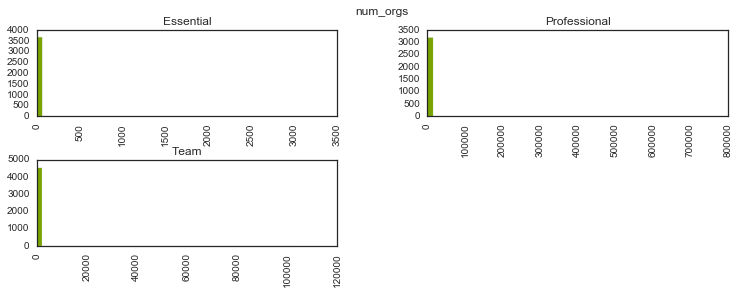

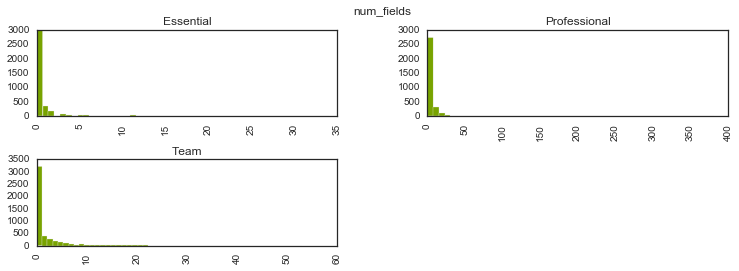

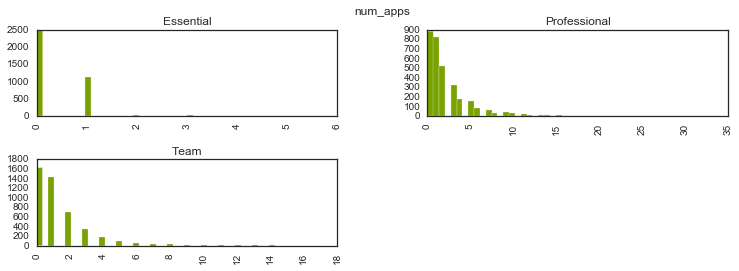

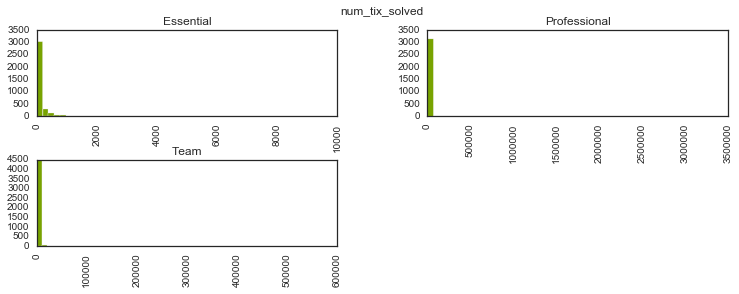

In [161]:
df_patagonia = df[df.pre_upgrade_plan.isin(['Essential','Team','Professional'])]

for x in continuous_features:
    df_patagonia[x].hist(by=df_patagonia.pre_upgrade_plan, color='#78A300', bins=50, figsize = (12, 4))
    pl.suptitle(x)

For all the continuous variables it appears that the distributions are similar across plan types with the highest outliers being higher on the more expensive plans.

#### Check the measure of skewedness for these variables across each plan:

In [162]:
df_patagonia.groupby('pre_upgrade_plan')[continuous_features].skew().transpose()

pre_upgrade_plan,Essential,Professional,Team
num_agents,2.153550,5.004877,5.526892
num_trig,-2.432297,17.189980,16.755267
num_automations,12.411710,6.048427,17.660804
num_tags,45.242085,36.555790,32.312940
num_macros,10.985100,8.027504,9.338648
num_groups,6.017151,4.839439,24.537931
num_orgs,53.560164,44.855920,45.659875
num_fields,7.452710,15.773425,4.630664
num_apps,1.997195,2.635539,2.578441
num_tix_solved,8.646480,32.948309,41.321126


<h2 style="color:#03363D">Dealing with Outliers</h2>

<span style="color:#37B8AF">**The 3 features that are the most skewed are num_tags, num_groups, and num_tickets**</span>

<p>Let's drop the upper 5% of values and see if that improves things</p>

In [163]:
#Extract 95th percentile
ninetyfifth = pd.DataFrame(cohort[continuous_features].quantile(.95)).transpose()

In [164]:
#List Outlier Columns
columns = ['num_tags','num_tix_solved','num_orgs']

#Create Copy of Data
dfcopy = cohort.copy()

#Remove Outliers
for column in columns:
    dfcopy = dfcopy[(dfcopy[column] < ninetyfifth.iloc[0][column])]

#Summarize
dfcopy.groupby('upgraded_boolean')[continuous_features].describe().transpose().round()

0                                          1             \
                count  mean   std min 25%  50%  75%    max count mean   std   
num_agents        608     4     4   1   1    3    5     31   150    3     3   
num_trig          608     8     5   0   6    7    8     45   150    6     3   
num_automations   608     2     1   0   1    1    2     22   150    1     1   
num_tags          608  1045  2646   0   4   88  709  19347   150  458  1608   
num_macros        608    10    15   0   4    4    7    153   150    6     8   
num_groups        608     2     2   1   1    1    2     21   150    2     2   
num_orgs          608     4    10   0   1    1    2     84   150    3     7   
num_fields        608     2     5   0   0    0    2     55   150    1     3   
num_apps          608     1     2   0   0    1    2     20   150    1     2   
num_tix_solved    608   624  1335   1  27  124  464   9416   150  308  1225   

                                         
                min 25% 50%  75%    max  
num_agents        0   1   2    5     19  
num_trig          0   5   6    7     22  
num_automations   0   1   1    1      7  
num_tags          0   2  12  188  12874  
num_macros        0   4   4    4     73  
num_groups        0   1   1    1     16  
num_orgs          0   1   1    2     63  
num_fields        0   0   0    2     16  
num_apps          0   0   0    1      9  
num_tix_solved    1   9  38  119  10020

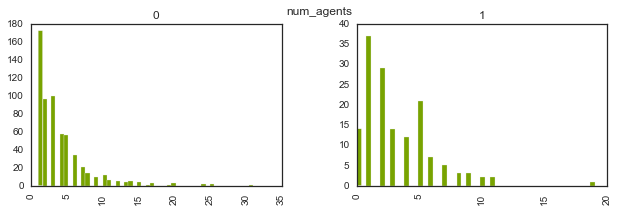

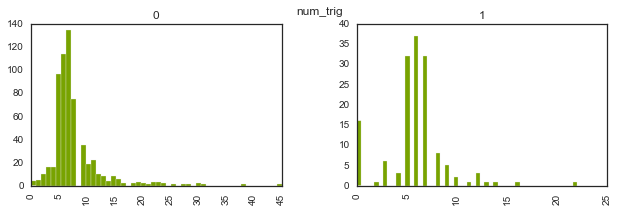

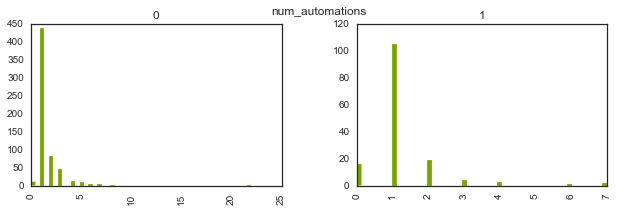

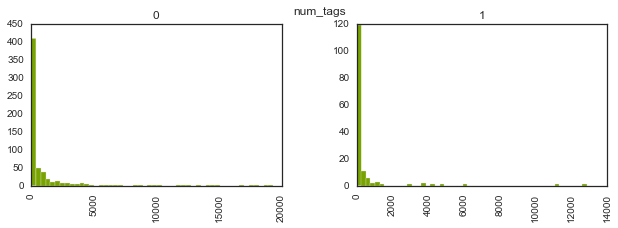

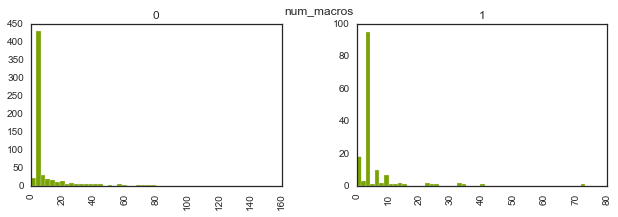

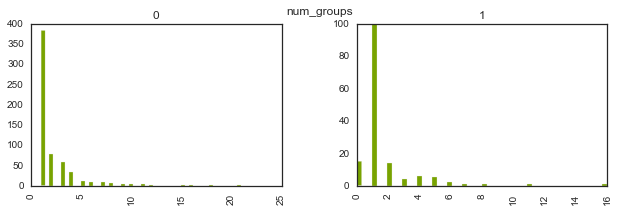

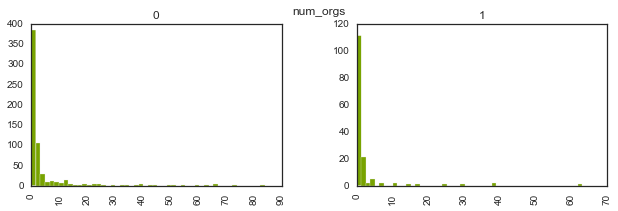

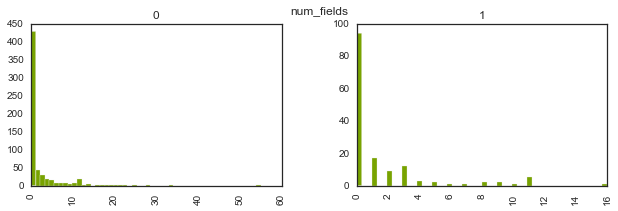

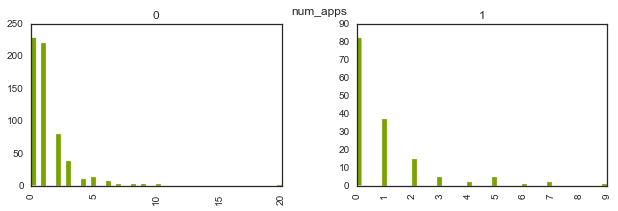

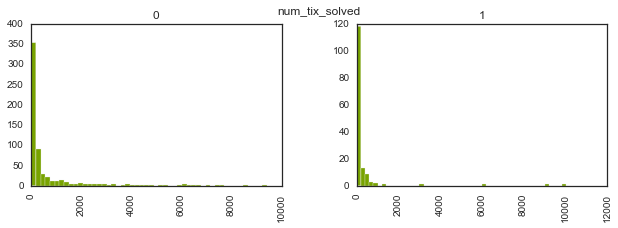

In [165]:
for x in continuous_features:
    dfcopy[x].hist(by=dfcopy.upgraded_boolean, color='#78A300', bins=50, figsize = (10, 3))
    pl.suptitle(x)

**Looking a little better, what if we drop all accounts with 0 usage of those extremely skewed features**

In [166]:
for feature in columns:
    print feature, dfcopy[dfcopy[feature] == 0].groupby('upgraded_boolean')['account_id'].count()

num_tags upgraded_boolean
0    99
1    17
Name: account_id, dtype: int64
num_tix_solved Series([], Name: account_id, dtype: int64)
num_orgs upgraded_boolean
0     6
1    16
Name: account_id, dtype: int64


In [167]:
for feature in continuous_features:
    dfcopy = dfcopy[dfcopy[feature] > 0]

In [168]:
dfcopy.groupby('upgraded_boolean')[continuous_features].describe().transpose().round()

0                                            1        \
                count  mean   std min  25%  50%   75%    max count  mean   
num_agents        177     6     5   1    2    4     7     31    37     5   
num_trig          177    10     6   1    7    8    11     45    37     8   
num_automations   177     2     2   1    1    1     2     22    37     2   
num_tags          177  2147  3816   1  100  546  2089  18814    37  1466   
num_macros        177    12    18   1    4    4    11    153    37     9   
num_groups        177     3     3   1    1    2     4     21    37     2   
num_orgs          177     8    13   1    1    2     7     84    37     6   
num_fields        177     5     6   1    1    3     6     55    37     4   
num_apps          177     2     2   1    1    2     3     20    37     3   
num_tix_solved    177  1053  1774   1   90  252  1080   9416    37   987   

                                                 
                  std min 25%  50%   75%    max  
num_agents          4   1   2    3     7     19  
num_trig            4   3   5    7     8     22  
num_automations     2   1   1    1     2      7  
num_tags         2968   2  14  235  1076  12874  
num_macros         14   1   4    4     6     73  
num_groups          3   1   1    1     3     16  
num_orgs           10   1   1    1     4     39  
num_fields          4   1   2    3     5     16  
num_apps            2   1   1    2     4      7  
num_tix_solved   2350   2  26   99   528  10020

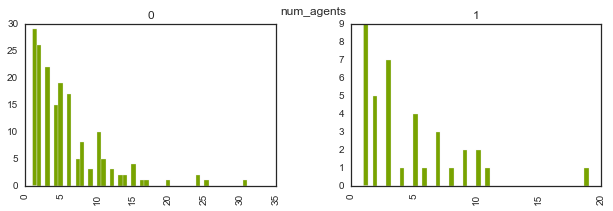

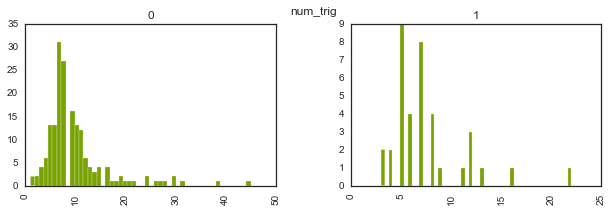

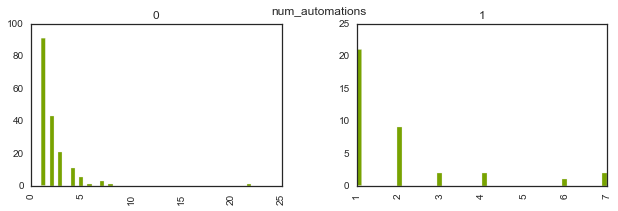

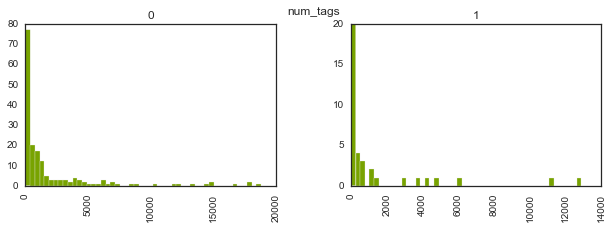

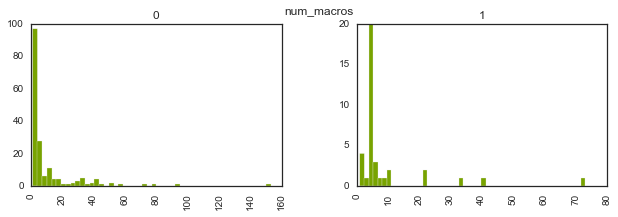

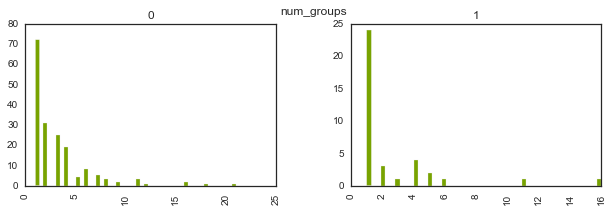

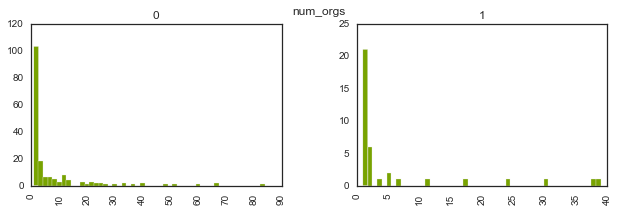

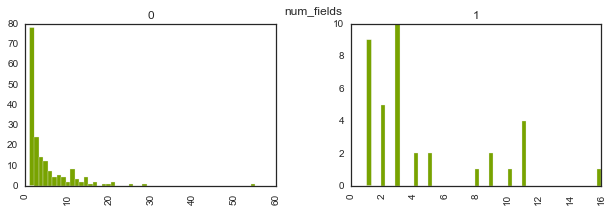

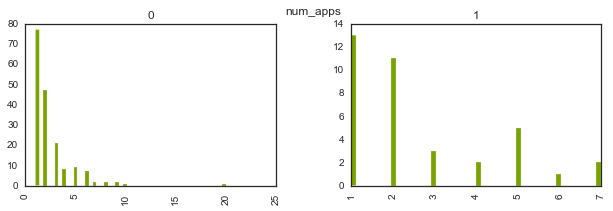

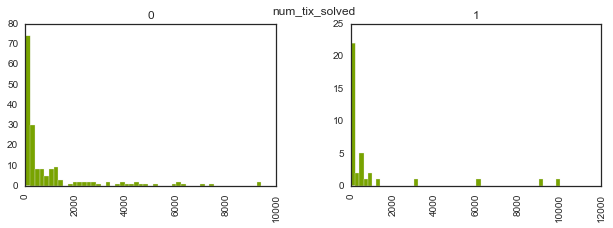

In [169]:
for x in continuous_features:
    dfcopy[x].hist(by=dfcopy.upgraded_boolean, color='#78A300', bins=50, figsize = (10, 3))
    pl.suptitle(x)

In [170]:
print dfcopy.groupby('upgraded_boolean').account_id.count()
print round(len(dfcopy[dfcopy.upgraded_boolean == 1])* 1./len(dfcopy), 3) * 100, "% upgraded"

upgraded_boolean
0    177
1     37
Name: account_id, dtype: int64
17.3 % upgraded


**We lost a bunch of accounts but the ratio is still similar (w/17% upgrading) and the distributions look even better**

<h2 style="color:#03363D">Normalizing and Standardizing</h2>

In [171]:
dfcopy_transform = dfcopy.copy().fillna(0)
# dfcopy_transform = dfcopy_transform.drop(features_to_remove, axis = 1)
# continuous_features_transform = continuous_features.remove('age_in_months')

for feature in continuous_features:
    dfcopy_transform[feature] = preprocessing.scale(np.log(dfcopy_transform[feature] + 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e067710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dd38f10>]], dtype=object)

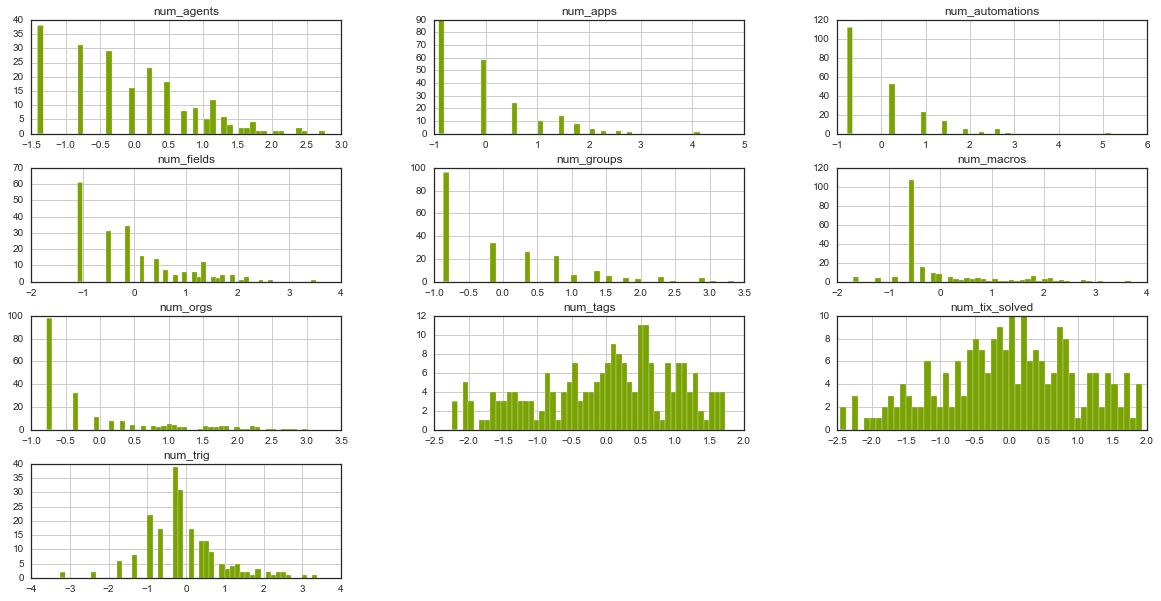

In [172]:
dfcopy_transform[continuous_features].hist(color='#78A300', bins=50, figsize = (20, 10))

**That's a lot better**

<h2 style="color:#03363D">Frequency Tables for Binary Variables</h2>

In [173]:
upgrade_frequency_table = pd.DataFrame(index = [0,1])
not_upgraded_frequency_table = pd.DataFrame(index = [0,1])

for feature in binary_features:                                                    
    upgrade_frequency_table[feature] = cohort_upgraded[feature].value_counts() / len(cohort_upgraded[feature]) * 100

for feature in binary_features:                                                   
    not_upgraded_frequency_table[feature] = cohort_not_upgraded[feature].value_counts() / len(cohort_not_upgraded[feature]) * 100


upgrade_frequency_table = upgrade_frequency_table.transpose().round(1)         
not_upgraded_frequency_table = not_upgraded_frequency_table.transpose().round(1)
upgrade_frequency_table.columns = [('Upgraded','False (%)'),('Upgraded','True (%)')]                         
not_upgraded_frequency_table.columns = [('Not-Upgraded','False (%)'),('Not-Upgraded','True (%)')]   

<h4 style="color:#37B8AF">UPGRADED (1) vs NOT-UPGRADED (0):</h4>

In [174]:
pd.concat([upgrade_frequency_table,not_upgraded_frequency_table], axis = 1)

,"(Upgraded, False (%))","(Upgraded, True (%))","(Not-Upgraded, False (%))","(Not-Upgraded, True (%))"
enabled_HC,61.4,38.6,49.6,50.4
enabled_redaction,100.0,NaN,96.7,3.3
enabled_insights,96.8,3.2,78.7,21.3
enabled_talk,93.7,6.3,91.4,8.6
enabled_widget,55.7,44.3,32.5,67.5
enabled_csat,93.7,6.3,84.0,16.0
enabled_hours,87.3,12.7,73.0,27.0
enabled_slas,99.4,0.6,97.5,2.5
enabled_HCcode,86.7,13.3,75.8,24.2
enabled_community,61.4,38.6,30.5,69.5


<h2 style="color:#03363D">Chi Square Test of Goodness of Fit</h2>

<span style="color:#37B8AF">**Is the variation we see between the groups in the binary variables statistically significant?**</span>

<p>The Chi Square Test tests the significance of the variation between groups (in this case the upgraded vs non-upgraded accounts).</p>

<span style="color:#B20000">*p-value <= 0.05 is considered significant*</span>

**Making the significant variables:**
- enabled_insights		
- enabled_widget
- enabled_community
- enabled_hours
- enabled_csat
- enabled_HCcode
- enabled_HC

In [175]:
# compute chi-square P value 
chi_square = pd.DataFrame(index = [0,1])
bf = cohort[binary_features].columns.tolist()

for feature in bf:
    x = stats.chi2_contingency(pd.crosstab(cohort['upgraded_boolean'],cohort[feature]))    
    x_sqr = x[0]
    p_value = x[1]
    chi_square[feature] = x_sqr, p_value
    
chi_square = chi_square.transpose().round(5)
chi_square.columns = ['X-squared','P-value']

chi_square.sort_values(by = "P-value")

,X-squared,P-value
enabled_insights,27.59798,0.00000
enabled_widget,28.70647,0.00000
enabled_community,51.82300,0.00000
enabled_hours,13.58573,0.00023
enabled_csat,9.03750,0.00264
enabled_HCcode,8.29599,0.00397
enabled_HC,6.65070,0.00991
enabled_redaction,4.23153,0.03968
enabled_slas,1.29096,0.25587
enabled_talk,0.58469,0.44448


<h2 style="color:#03363D">Collinearity</h2>

<span style="color:#37B8AF">**It is important to check for collinearity amongst the independent variables**</span>

Collinearity is when two variables are strongly correlated and can therefore be predicted by one another. This phenomenon can skew the effect the input variables have on your model.

The below heatmap helps us to navigate the correlation matrix below it.

In [176]:
corr = cohort.drop(['account_id','year_month_won','mrr_delta'], axis = 1).corr().round(2)

corr

,upgraded_boolean,age_in_months,num_agents,num_trig,num_automations,num_tags,num_macros,num_groups,num_orgs,num_fields,enabled_HC,enabled_redaction,enabled_insights,enabled_talk,enabled_widget,enabled_csat,enabled_hours,enabled_slas,enabled_HCcode,enabled_community,num_apps,num_tix_solved
upgraded_boolean,1.00,-0.90,-0.08,-0.09,-0.07,-0.03,-0.07,-0.08,0.03,-0.01,-0.09,-0.08,-0.18,-0.03,-0.19,-0.11,-0.13,-0.05,-0.10,-0.25,-0.09,-0.04
age_in_months,-0.90,1.00,0.09,0.10,0.12,0.03,0.11,0.11,0.01,0.03,0.16,0.07,0.17,0.03,0.25,0.10,0.13,0.06,0.12,0.36,0.12,0.04
num_agents,-0.08,0.09,1.00,0.35,0.25,0.13,0.33,0.63,0.08,0.24,0.11,0.06,0.33,0.02,-0.00,0.25,0.14,0.23,0.13,0.14,0.33,0.23
num_trig,-0.09,0.10,0.35,1.00,0.25,0.07,0.30,0.41,0.04,0.22,0.07,0.23,0.24,0.02,0.01,0.15,0.17,0.12,0.18,0.15,0.27,0.15
num_automations,-0.07,0.12,0.25,0.25,1.00,0.04,0.30,0.29,0.09,0.28,0.17,0.25,0.35,0.10,0.11,0.43,0.25,0.24,0.18,0.17,0.36,0.15
num_tags,-0.03,0.03,0.13,0.07,0.04,1.00,0.23,0.11,0.02,0.07,0.05,-0.00,0.12,0.00,0.02,0.12,0.08,0.06,-0.02,0.04,0.05,0.07
num_macros,-0.07,0.11,0.33,0.30,0.30,0.23,1.00,0.28,0.04,0.19,0.04,0.12,0.17,0.05,0.07,0.18,0.11,0.10,0.08,0.07,0.25,0.19
num_groups,-0.08,0.11,0.63,0.41,0.29,0.11,0.28,1.00,0.18,0.35,0.15,0.06,0.29,0.05,0.06,0.23,0.19,0.18,0.15,0.21,0.35,0.23
num_orgs,0.03,0.01,0.08,0.04,0.09,0.02,0.04,0.18,1.00,0.06,0.06,-0.02,0.05,-0.02,0.07,0.06,0.08,0.07,0.09,0.08,0.17,0.04
num_fields,-0.01,0.03,0.24,0.22,0.28,0.07,0.19,0.35,0.06,1.00,0.16,0.11,0.23,0.10,0.05,0.28,0.19,0.10,0.10,0.14,0.33,0.20


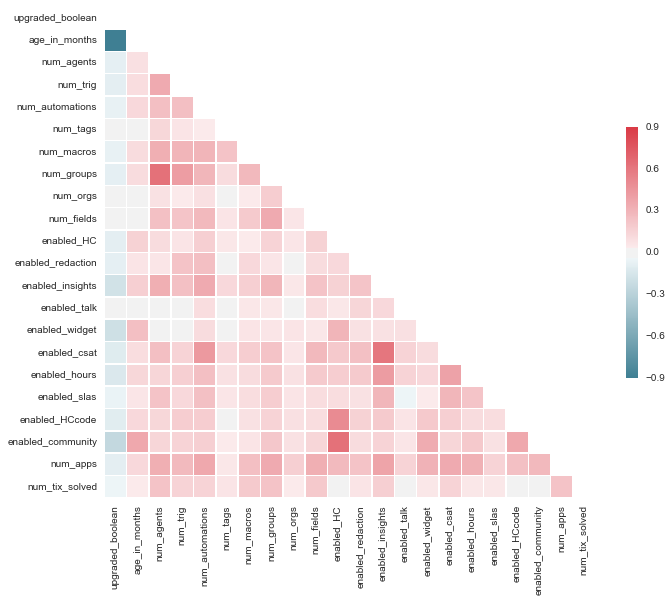

In [177]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
#subplot.set_yticklabels([None] + list(corr.columns), rotation = 90)

**It seems as if all correlations are positive amongst our continuous numeric variables, with only one as high as .6 (num_agents and num_groups) which makes sense because groups are used to organize agents.**

**Amongst the binary variables, all the Help Center features are correlated (enabling, using custom code and using the community), and enabling CSat and Insights are both correlated because they are only available on the Professional Plan.**

**The negative coorelation between age_in_months and upgrading is due to the way I collected data, with all the non-upgraded accounts having their data collected at the end of the period. This should go away when we do customer/month combinations.**

<h1 style="color:#03363D">Building the Model</h1>
<p>Now that we have a pretty good understanding of our data, let's build a model! <br>

<p>To deal with the low number of observations in each cohort, we want to use all the data, but this leaves us with the question of time. To deal with this we will convert customer/month/year combinations into unique observations as to see how behavior and age relate to the action of upgrading.</p>

<h3 style="color:#03363D">Import New Data</h3>

*customer month observations*

In [178]:
upgraded = pd.read_csv('upgraded_months.csv')
not_upgraded = pd.read_csv('not_upgraded_months.csv')
df = pd.concat([upgraded,not_upgraded], axis=0, join='outer')

In [179]:
print df.isnull().sum()[df.isnull().sum() > 0]

year_month_upgraded    88499
post_upgrade_plan      88499
mrr_delta                 60
num_trig                   3
num_automations            3
num_tags                   3
num_macros                 3
num_groups                56
num_orgs                  56
num_fields                56
enabled_insights       77945
enabled_HCcode         34189
enabled_community      38582
num_tix_solved         12051
dtype: int64


Looks good. The nulls are for accounts not using features and those that didn't upgrade.

### Drop all accounts with 0 tickets
*they're not using the product*

In [180]:
df = df.fillna(0)

In [181]:
df = df[df.num_tix_solved > 0]

In [182]:
#sort by accounts and their monthly observations so we can create monthly change ratios in the correct order
df =  df.sort_values(by=['account_id', 'year_month_run'], axis = 0, ascending=[True, True])
df = df.reset_index(drop = True)

<h2 style="color:#03363D">Feature Engineering</h2>
#### Create Month over Month Change Ratios

After having made change ratios for all the coninuos numeric variables it turns out that changes are so minimal across most, that only `num_tix_solved` made sense. Too see the distribution of deltas for the other variables, go [here](https://drive.google.com/a/zendesk.com/file/d/0B-hA0alWDrG-aEpQclZJUXFsZ3M/view?usp=sharing).

In [183]:
continuous_features_sub = ['num_tix_solved']
for i in continuous_features_sub:
    f = '%change_' + str(i)
    df[f] = ''
    n = 0
    for a in df.account_id.unique(): 
        b = 0
        while b < len(df[df.account_id == a]):
            if (b-1 < 0) | (n-1 < 0): 
                df.loc[n,f] = "null" 
            else: 
                df.loc[n,f] = (df.loc[n,i] - df.loc[n-1,i])/ df.loc[n-1,i]
            b = b + 1
            n = n + 1

**Check how many unique accounts we have**

In [184]:
print df.groupby('upgraded_boolean').account_id.nunique()
print round(df[df.upgraded_boolean == 1].account_id.nunique() * 1. / df.account_id.nunique() * 100,2), "% upgraded"

upgraded_boolean
0    12975
1     1238
Name: account_id, dtype: int64
9.11 % upgraded


**Drop the nulls created when calculating month over month deltas (first row for each account)**

In [185]:
df = df[df['%change_num_tix_solved'] != 'null']

**Check how many unique accounts we have after dropping nulls**

In [186]:
print df.groupby('upgraded_boolean').account_id.nunique()
print round(df[df.upgraded_boolean == 1].account_id.nunique() * 1. / df.account_id.nunique() * 100,2), "% upgraded"

upgraded_boolean
0    10803
1      831
Name: account_id, dtype: int64
7.44 % upgraded


### Remove All Enterprise Plans 
*it's the highest plan, no upgrading*

In [187]:
df = df[(df.pre_upgrade_plan != 0) & (df.pre_upgrade_plan != 'Enterprise Elite') & (df.pre_upgrade_plan != 'Enterprise') & (df.pre_upgrade_plan != 'Enterprise (Legacy)')]

In [188]:
print df.groupby('upgraded_boolean').account_id.nunique()
print round(df[df.upgraded_boolean == 1].account_id.nunique() * 1. / df.account_id.nunique() * 100,2), "% upgraded"

upgraded_boolean
0    10110
1      831
Name: account_id, dtype: int64
7.93 % upgraded


In [189]:
print df.groupby(['upgraded_boolean','pre_upgrade_plan']).account_id.nunique()

upgraded_boolean  pre_upgrade_plan
0                 Essential           2929
                  Plus                 235
                  Professional        2897
                  Regular              122
                  Starter              237
                  Team                3816
1                 Essential            389
                  Plus                  12
                  Professional         101
                  Regular               11
                  Starter               13
                  Team                 309
Name: account_id, dtype: int64


#### Convert the engineered monthly delta into a float

In [190]:
df['%change_num_tix_solved'] = df['%change_num_tix_solved'].astype(float, copy=False)

In [191]:
continuous_features.append('%change_num_tix_solved')

### Create Dummies for the `pre_upgrade_plan` Feature 

In [192]:
pre_upgrade_plan_df = pd.get_dummies(df.pre_upgrade_plan, prefix = None)
df = pd.concat([df, pre_upgrade_plan_df], axis = 1)
df = df.drop('pre_upgrade_plan', axis = 1)

In [193]:
pre_upgrade_plan_df.sum().sort_values()

Regular          1138
Starter          1842
Plus             2025
Essential       13607
Professional    14809
Team            19175
dtype: float64

In [194]:
print "Total accounts in dataset", df.account_id.nunique()

Total accounts in dataset 10480


### Drop the Plan type that upgrades most often - use as our baseline 
Essential upgrades the most

### Drop all the unwanted columns

In [195]:
df.drop(['year_month_run','year_month_won','year_month_upgraded','post_upgrade_plan','upgrade_levels', 'mrr_delta', 'Essential'], axis = 1, inplace= True)

<h2 style="color:#03363D">Normalizing and Standardizing</h2>

#### Check distributions before transformations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1265cab90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13369b710>]], dtype=object)

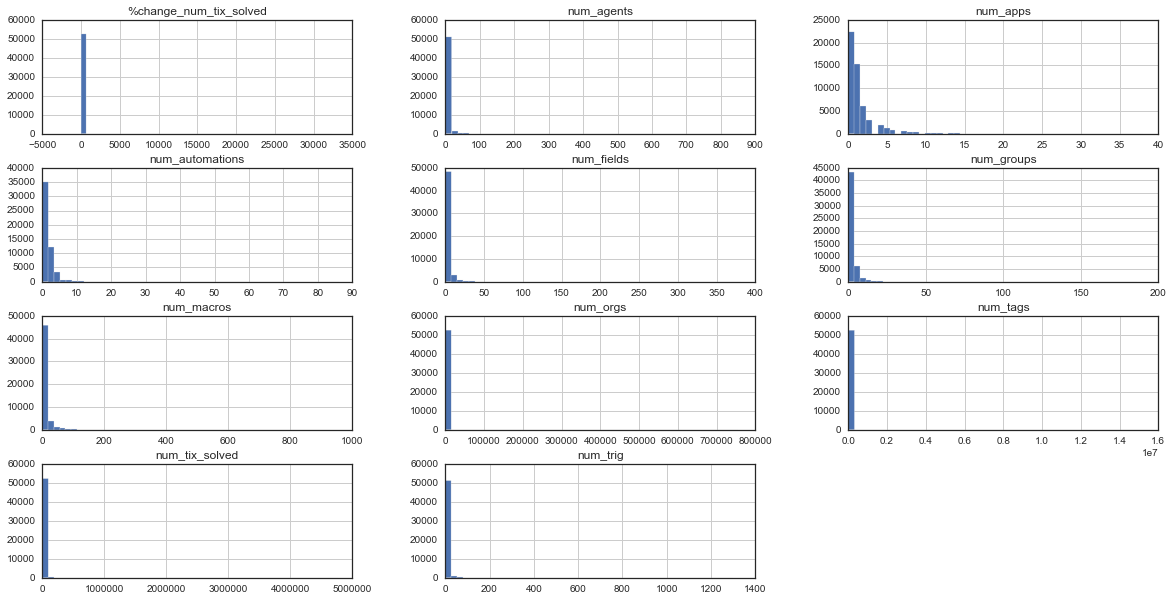

In [196]:
df[continuous_features].hist(bins=50, figsize = (20, 10))

In [197]:
df[continuous_features].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
num_agents,52596,4.85,12.80,1,1.00,3.00,5.00,860
num_trig,52596,8.92,19.59,0,6.00,7.00,8.00,1298
num_automations,52596,1.86,2.52,0,1.00,1.00,2.00,86
num_tags,52596,7150.22,139190.66,0,9.00,114.00,975.00,15774606
num_macros,52596,11.01,25.15,0,4.00,4.00,8.00,927
num_groups,52596,2.52,4.22,0,1.00,1.00,3.00,186
num_orgs,52596,302.87,10197.99,0,1.00,1.00,3.00,755454
num_fields,52596,2.30,7.46,0,0.00,0.00,2.00,381
num_apps,52596,1.41,2.21,0,0.00,1.00,2.00,38
num_tix_solved,52596,3603.45,45536.54,1,29.00,138.00,700.00,4768478


<h2 style="color:#03363D">Measuring Skewness</h2>

- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.

In [198]:
df[continuous_features].skew().sort_values()

num_apps                    3.511197
num_automations            11.903324
num_macros                 12.098244
num_groups                 12.613796
num_fields                 22.652736
num_trig                   37.672032
num_agents                 43.856865
num_tix_solved             57.532181
num_orgs                   61.495056
num_tags                   69.562850
%change_num_tix_solved    145.148998
dtype: float64

### Test a log transformation and regraph

In [199]:
dftest = df.copy()

for feature in continuous_features:
    dftest[feature] = preprocessing.scale(np.log(dftest[feature] + 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132dabb90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x133a6c4d0>]], dtype=object)

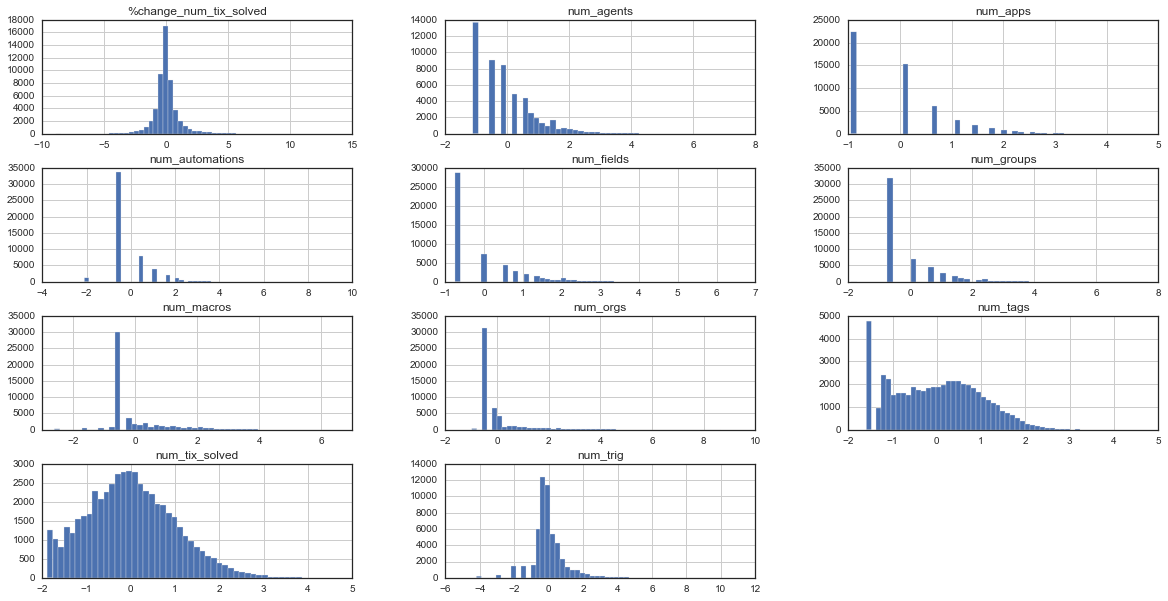

In [200]:
dftest[continuous_features].hist(bins=50, figsize = (20, 10))

In [201]:
dftest[continuous_features].skew().sort_values()

num_tags                  0.178928
num_tix_solved            0.344015
num_apps                  0.839569
%change_num_tix_solved    1.055909
num_agents                1.069630
num_trig                  1.227139
num_fields                1.265399
num_macros                1.734739
num_automations           1.768080
num_groups                1.842248
num_orgs                  3.065996
dtype: float64

<h2 style="color:#03363D">Outliers</h2>

**Looks a bit better... what if we drop the highest outliers?**

In [202]:
#Extract 98th percentile
ninetyeighth = pd.DataFrame(df[continuous_features].quantile(.98)).transpose()

#List Outlier Columns
columns = ['num_orgs']

#Create Copy of Data
dfcopy = df.copy()

#Remove Outliers
for column in columns:
    dfcopy = dfcopy[(dfcopy[column] < ninetyfifth.iloc[0][column])]

#Summarize
dfcopy[continuous_features].describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
num_agents,49944,4,6,1,1,3,5,162
num_trig,49944,8,13,0,6,7,8,645
num_automations,49944,2,2,0,1,1,2,86
num_tags,49944,4672,73208,0,8,92,776,8280793
num_macros,49944,11,23,0,4,4,7,660
num_groups,49944,2,3,0,1,1,2,82
num_orgs,49944,4,10,0,1,1,2,89
num_fields,49944,2,7,0,0,0,2,381
num_apps,49944,1,2,0,0,1,2,22
num_tix_solved,49944,2668,27109,1,27,126,600,3562136


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e52a550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1330a4d90>]], dtype=object)

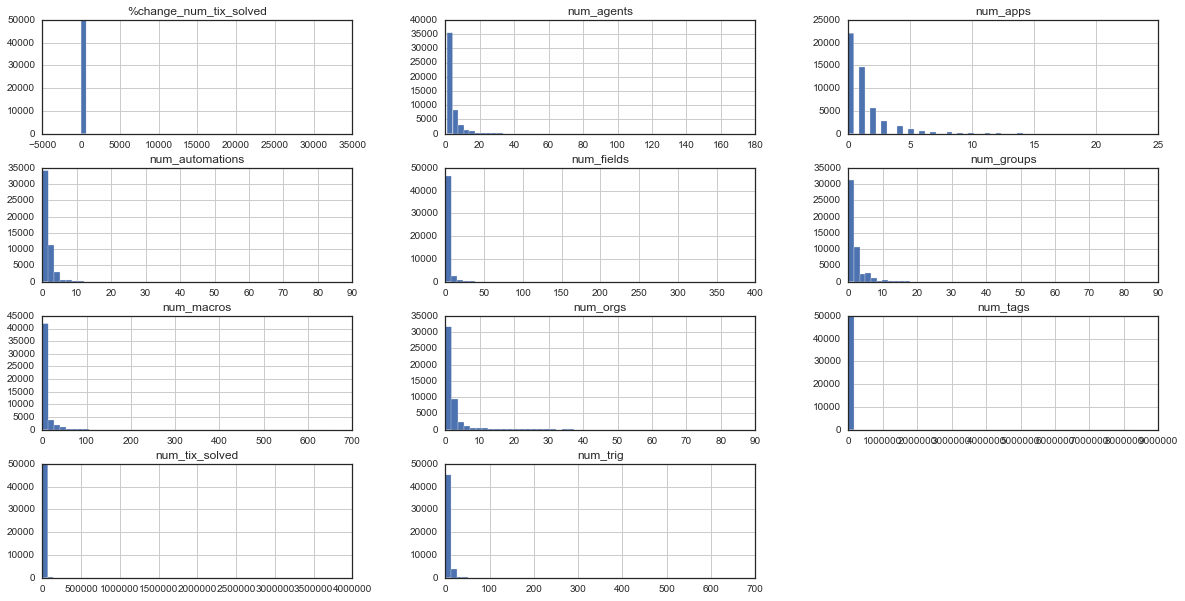

In [203]:
dfcopy[continuous_features].hist(bins=50, figsize = (20, 10))

In [204]:
for feature in continuous_features:
    dfcopy[feature] = preprocessing.scale(np.log(dfcopy[feature] + 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134e8fe50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13afb6b90>]], dtype=object)

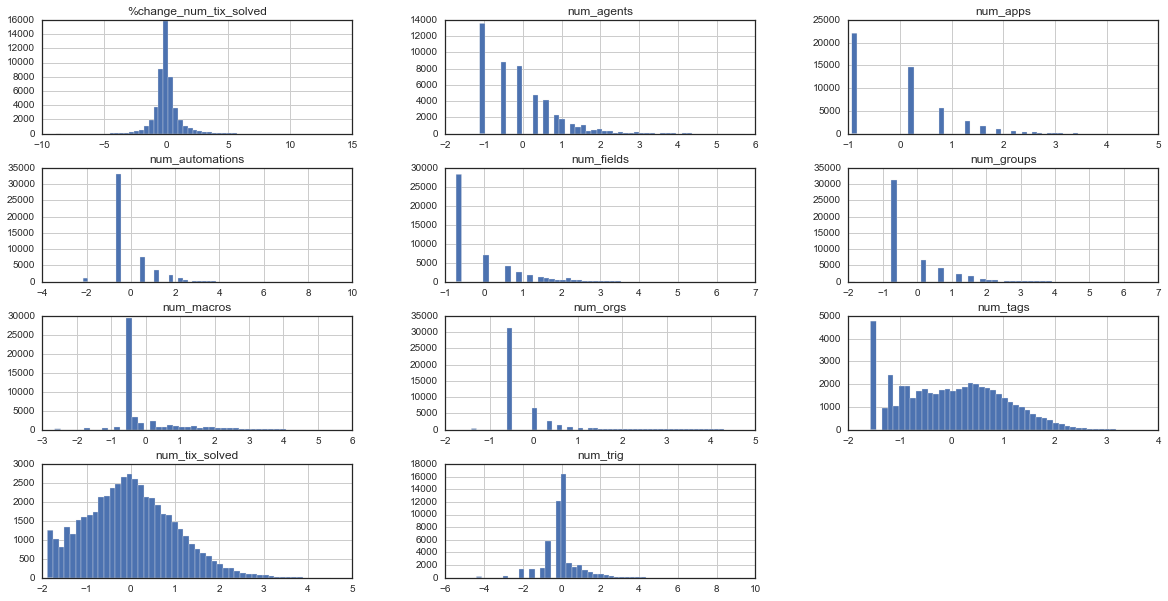

In [205]:
dfcopy[continuous_features].hist(bins=50, figsize = (20, 10))

In [206]:
dfcopy[continuous_features].skew().sort_values()

num_tags                  0.196102
num_tix_solved            0.336873
num_apps                  0.866082
%change_num_tix_solved    0.965756
num_agents                0.978398
num_trig                  0.986535
num_fields                1.348243
num_macros                1.784010
num_automations           1.820362
num_groups                1.868272
num_orgs                  2.226575
dtype: float64

**That helped a little, brought num_orgs skew down from 3.07 to 2.23**

<h2 style="color:#03363D">Split Test and Train at the `account_id` Level</h2>

In [207]:
print dfcopy.account_id.nunique(), "unique account ids"

10122 unique account ids


In [208]:
accounts = dfcopy.account_id.unique()

In [209]:
train_accounts, test_accounts = sklearn.model_selection.train_test_split(accounts, train_size = .6, random_state = 0)

In [210]:
print len(train_accounts), "training accounts"
print len(test_accounts), "testing accounts"

6073 training accounts
4049 testing accounts


In [211]:
print len(dfcopy.loc[dfcopy['account_id'].isin(train_accounts)]), "training rows"
print len(dfcopy.loc[dfcopy['account_id'].isin(test_accounts)]), "testing rows"

30108 training rows
19836 testing rows


In [212]:
train_X = dfcopy.loc[dfcopy['account_id'].isin(train_accounts)].drop(['upgraded_boolean','account_id'], axis=1)
test_X = dfcopy.loc[dfcopy['account_id'].isin(test_accounts)].drop(['upgraded_boolean','account_id'], axis=1)
train_c = dfcopy.loc[dfcopy['account_id'].isin(train_accounts)].upgraded_boolean
test_c = dfcopy.loc[dfcopy['account_id'].isin(test_accounts)].upgraded_boolean

#### Add an intercept

In [213]:
train_X['intercept'] = 1
test_X['intercept'] = 1

<h2 style="color:#03363D">Feature Selection</h2>

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

logit = LogisticRegression()

estimator = LogisticRegression()
selector = RFECV(estimator)
selector = selector.fit(train_X,train_c)

support = pd.DataFrame(data = selector.support_, index = train_X.columns, 
             columns = ['support']).query("support == True")
support

,support
age_in_months,True
num_agents,True
num_trig,True
num_automations,True
num_tags,True
num_macros,True
num_groups,True
num_orgs,True
num_fields,True
enabled_HC,True


**The RFECV Feature Selector seems to think all features are important to include.**

## Logistic Regression - `statsmodel`

I tried dropping some of the variables with the highest p-values and rerunning the model, but it didn't improve the R-squared value much, R^2 started at -0.1071, moved to -0.1086 after removing all the features with p-value > 0.05. 

It turns out that the R^2 in classifications is not the same thing as the model accuracy score (while in regressions it is the same thing). In order to get an accuracy score with `statsmodel`, you have to calculate it manually. I chose not to do this, but rather just use the output to tell me the p-values of each feature.

In [215]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl

#train_X_drop = train_X.drop(['enabled_slas','num_trig','num_agents','enabled_csat','num_groups',
#'enabled_talk','num_macros','enabled_redaction','num_automations','num_orgs','enabled_insights'],axis = 1)

logit = sm.Logit(train_c, train_X)
result = logit.fit()
print result.summary()

#also try making the two classes more balanced by selecting random 0 class observations to match the number of 1s...

Optimization terminated successfully.
         Current function value: 0.112126
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       upgraded_boolean   No. Observations:                30108
Model:                          Logit   Df Residuals:                    30080
Method:                           MLE   Df Model:                           27
Date:                Mon, 26 Jun 2017   Pseudo R-squ.:                 0.06351
Time:                        17:44:10   Log-Likelihood:                -3375.9
converged:                       True   LL-Null:                       -3604.8
                                        LLR p-value:                 7.299e-80
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
age_in_months             -0.0760      0.015     -4.978      0.000        -0.106    

In [216]:
insignificant = pd.DataFrame(result.pvalues.sort_values(), columns = ['p-values']).round(4)[result.pvalues >= 0.05]
significant = pd.DataFrame(result.pvalues.sort_values(), columns = ['p-values']).round(4)[result.pvalues < 0.05]
print "SIGNIFICANT"
print pd.DataFrame(significant)

SIGNIFICANT
                        p-values
intercept                 0.0000
Professional              0.0000
Team                      0.0000
Plus                      0.0000
num_tix_solved            0.0000
age_in_months             0.0000
Starter                   0.0000
Regular                   0.0000
%change_num_tix_solved    0.0000
enabled_talk              0.0001
enabled_hours             0.0054
num_agents                0.0305
enabled_HC                0.0451
enabled_community         0.0490


In [217]:
print "INSIGNIFICANT"
print pd.DataFrame(insignificant)

INSIGNIFICANT
                   p-values
num_groups           0.0785
enabled_widget       0.0880
num_macros           0.1389
enabled_redaction    0.1846
num_tags             0.2785
num_trig             0.3346
enabled_slas         0.3461
num_apps             0.4430
num_automations      0.4714
num_orgs             0.6005
enabled_HCcode       0.6989
enabled_insights     0.8093
enabled_csat         0.9135
num_fields           0.9336


In [218]:
train_X_drop = train_X.drop(insignificant.index.tolist(), axis = 1)
logit2 = sm.Logit(train_c, train_X_drop)
result2 = logit2.fit()
print result2.summary()

Optimization terminated successfully.
         Current function value: 0.112440
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       upgraded_boolean   No. Observations:                30108
Model:                          Logit   Df Residuals:                    30094
Method:                           MLE   Df Model:                           13
Date:                Mon, 26 Jun 2017   Pseudo R-squ.:                 0.06089
Time:                        17:44:10   Log-Likelihood:                -3385.3
converged:                       True   LL-Null:                       -3604.8
                                        LLR p-value:                 1.289e-85
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
age_in_months             -0.0741      0.015     -4.877      0.000        -0.104    

## Interpreting the Results (`statsmodel`)

In [227]:
new_continuous = significant.index[significant.index.str.contains("num_").tolist()]

In [229]:
train_X_unlogged = pd.concat([np.exp(train_X_drop[new_continuous]),train_X_drop.drop(new_continuous, axis = 1)],axis = 1)
train_X_unlogged

means = pd.Series(train_X_unlogged.mean(), name = 'mean')

stds = pd.Series(np.std(train_X_unlogged), name = 'std')

unlogged_units = pd.concat([means, stds], axis = 1)

data2 = {'Coefficient' : result2.params,
        'Odds Ratio' : np.exp(result2.params), 
        'Mean' : unlogged_units['mean'],
        'Standard Deviation' : unlogged_units['std']}

model_interpretation = pd.DataFrame(data = data2).sort_values(by = "Odds Ratio", ascending = False)

In [230]:
model_interpretation

,Coefficient,Mean,Odds Ratio,Standard Deviation
enabled_talk,0.450771,0.086821,1.569521,0.281572
num_tix_solved,0.400706,1.727453,1.492879,2.671593
enabled_hours,0.265576,0.243058,1.304183,0.428930
enabled_HC,0.247907,0.450345,1.281341,0.497528
enabled_community,0.244660,0.602664,1.277187,0.489347
%change_num_tix_solved,0.133619,6.273006,1.142958,292.504874
num_agents,0.050020,2.069259,1.051292,7.003767
age_in_months,-0.074138,5.214428,0.928544,2.639817
Team,-0.953928,0.374917,0.385225,0.484101
Starter,-1.472489,0.036734,0.229354,0.188109


An independent variable's odds ratio is the amount by which a one-unit change in the independent variable will multiply the dependent variable. For example, the effect of enabling talk is to multiply the probability of upgrading by about 1.57.

But how do we know the probability of upgrading? It's the odds ratio of the intercept:  
According to the model, the baseline odds that a Customer will upgrade is 6%.

If enabling talk increases this by 1.57, the probability of upgrading goes up to 9.4%.

## Logistic Regression - `sklearn`

You'll notice that while the coefficients from statsmodel and sklearn are similar, they do differ slightly because sklearn does regularizations and statsmodel does not. Another benefit of sklearn is that you can do Grid Search and k-Folds cross validations.

In [231]:
model = linear_model.LogisticRegression(class_weight='balanced').fit(train_X, train_c)

coefficients = pd.concat([pd.DataFrame(train_X.columns),pd.DataFrame(np.transpose(model.coef_)),pd.DataFrame(np.transpose(np.exp(model.coef_)))], axis = 1)
coefficients.columns = ['Feature','Coefficient','Odds Ratio']
coefficients.sort_values(by = "Odds Ratio", ascending = False).set_index('Feature')

,Coefficient,Odds Ratio
Feature,,
enabled_talk,0.479598,1.615425
intercept,0.386182,1.471352
enabled_hours,0.271592,1.312052
num_tix_solved,0.252729,1.287535
enabled_HC,0.233917,1.263540
enabled_community,0.174986,1.191229
enabled_widget,0.156443,1.169344
%change_num_tix_solved,0.111926,1.118430
num_tags,0.103008,1.108501


In [232]:
print "My training score is", model.score(train_X, train_c)
print "My generalization score is", model.score(test_X, test_c)

My training score is 0.623688056331
My generalization score is 0.632990522283


## Calculate Probability Scores and Predicted Classes  - `sklearn`

In [233]:
params = np.append(model.intercept_,model.coef_)
predicted_class = model.predict(train_X)
probabilities = model.predict_proba(train_X)

## Confusion Matrix - `sklearn`

In [234]:
pd.crosstab(predicted_class,
    train_c,
    rownames = ['Predicted'],
    colnames = ['Actual'], margins = True)

Actual,0,1,All
Predicted,,,
0,18241,239,18480
1,11091,537,11628
All,29332,776,30108


We are predicting 1 way more often than it is actually happening. Our false positives are much higher than our false negatives

## Grid Search

In [235]:
gs = model_selection.GridSearchCV(
    estimator = linear_model.LogisticRegression(),
    param_grid = {'C': np.logspace(-10, 10, 21), 'penalty': ['l1','l2'], 'class_weight':['balanced', None]},
    cv = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [236]:
gs.best_params_

{'C': 1e-10, 'class_weight': 'balanced', 'penalty': 'l1'}

### Let's check the Grid Search recommended hyperparameters against my model's

In [237]:
gs.best_estimator_

LogisticRegression(C=1e-10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [238]:
model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [239]:
modelv2 = linear_model.LogisticRegression(C=1e-10,penalty='l1').fit(train_X, train_c)

In [240]:
print "My training score is", modelv2.score(train_X, train_c)
print "My generalization score is", modelv2.score(test_X, test_c)

My training score is 0.974226119304
My generalization score is 0.970608993749


**Wow! 97% accuracy!!** Let's check our confusion matrix...

In [241]:
predicted_classv2 = modelv2.predict(train_X)
probabilitiesv2 = modelv2.predict_proba(train_X)

In [242]:
pd.crosstab(predicted_classv2,
    train_c,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0,29332,776


The Grid Search recommended parameters gave me a 97% training and generalization score... because it caused the model *to predict only 0s* even with `class_weight = balanced`!

Let's stick with the original logistic regression model and check the AUC.

## Evaluating Model Performance With Area Under the Curve (AUC)

In [243]:
from sklearn import metrics

upgrade_actual = train_c
upgrade_prob = pd.DataFrame(probabilities)[1]

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(upgrade_actual, upgrade_prob)

If we make a chart with the false positive rate on the x-axis and the true positive rate on the y-axis, we can visualize the trade-off between the proportion of true predictions and false predictions we are making. We are hoping for a smooth arc that curves far up and to the left. We want to maximize the area under the curve (AUC).

Our classifier is moderately good. The black dotted line represents what the AUC would look like if we were predicting whether or not an account would upgrade by using a coin flip.

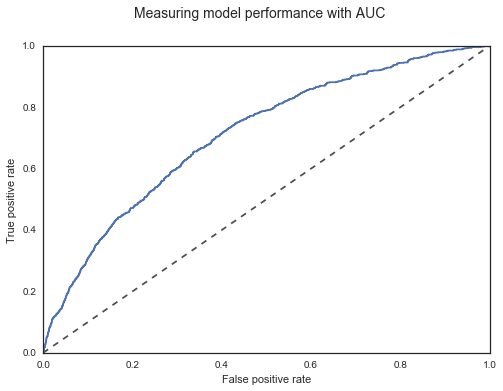

In [244]:
fig, ax = plt.subplots()
fig.suptitle("Measuring model performance with AUC", fontsize = 14, y = 1)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = '.3')
_=plt.plot(false_positive_rate,true_positive_rate)

We can quantify the data in this chart by calculating the proportion of the chart that falls under the curve. An AUC of 0.5 corresponds to the dotted black line, or a model that simply predicts "Upgrades" 50% of the time. **Our AUC is better than a random classifier at 0.71.**

In [245]:
auc = np.trapz(true_positive_rate,false_positive_rate)
round(auc,4)

0.7116

<h2 style="color:#03363D">Principle Component Analysis</h2>

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. 

These components can then be used to do additional modeling (k-Means Clustering, Logistic Regression, etc).

In [246]:
from sklearn import decomposition, cluster

# fit the model using our normalized training data
pca = decomposition.PCA().fit(train_X) 

In [247]:
#transform the training data with the newly fit model and check the output
X_prime = pca.transform(train_X)
X_prime = pd.DataFrame(X_prime)

In [248]:
X_prime.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-2.101608,6.839125,-1.645962,-0.344733,2.109744,0.775346,-1.984925,-2.992683,-0.259837,-0.508243,-0.731930,0.463649,-0.009265,-0.169156,0.410595,-0.665005,0.261833,0.643789,-0.185201,0.620103,0.938219,0.163325,-0.176344,-0.351177,-0.199274,0.030722,-0.080603,0
1,-1.122283,6.618056,-1.912017,-0.485660,2.128558,0.723751,-1.892856,-2.843556,-0.201358,-0.340765,-0.703025,0.447250,-0.011570,-0.132366,0.411083,-0.664161,0.273417,0.632840,-0.183621,0.614861,0.934305,0.163806,-0.181554,-0.348868,-0.198140,0.027318,-0.083686,0
2,-0.130552,6.472183,-2.003931,-0.506049,2.140338,0.754832,-1.885614,-2.873230,-0.156294,-0.322234,-0.704414,0.469631,-0.039756,-0.172012,0.442764,-0.647331,0.274011,0.609158,-0.171737,0.633800,0.922926,0.185726,-0.207359,-0.382321,-0.118729,-0.422488,0.801955,0
3,0.813351,6.084303,-1.655636,-0.394120,1.929742,0.378496,-2.030555,-2.609220,-0.646278,-0.657693,-0.694730,0.342602,-0.137151,-0.242851,0.488559,-0.653866,0.283380,0.602972,-0.159625,0.633258,0.914299,0.195217,-0.219876,-0.377284,-0.114752,-0.422905,0.798141,0
4,1.795820,5.916078,-1.598612,-0.284615,1.908989,0.352519,-2.037979,-2.581276,-0.685744,-0.680680,-0.675941,0.336049,-0.146763,-0.240276,0.495541,-0.650037,0.287722,0.591766,-0.158248,0.630866,0.906020,0.194676,-0.226533,-0.374319,-0.112433,-0.426219,0.795509,0


You can see in the table above that there are the same number of variables as our original set of features in train_X, but they have all been transformed to remove any collinearity.

**We can check the % of explained variance for each of the 27 components (these will add up to 1):**

In [249]:
normalized_var = pca.explained_variance_ratio_

In [250]:
normalized_var.round(5)

array([ 0.35443,  0.20152,  0.06387,  0.0509 ,  0.04736,  0.04072,
        0.03611,  0.03265,  0.03117,  0.02475,  0.02022,  0.01929,
        0.01822,  0.01261,  0.00886,  0.00723,  0.00637,  0.00491,
        0.00376,  0.00366,  0.00341,  0.00258,  0.00166,  0.00126,
        0.0009 ,  0.00078,  0.00077,  0.     ])

In [251]:
normalized_var.sum()

1.0

The first principle component explains 35.8% of the variance, the second, 20.9% and the third, 6.2%. That means that the first 3 principle components explain 62.9% of the variance in the data.

**Screeplot**

This graph is a way of visualizing how much variance is explained by each principle component, in order of most explanatory to least.

(-0.01, 0.36442787719471692)

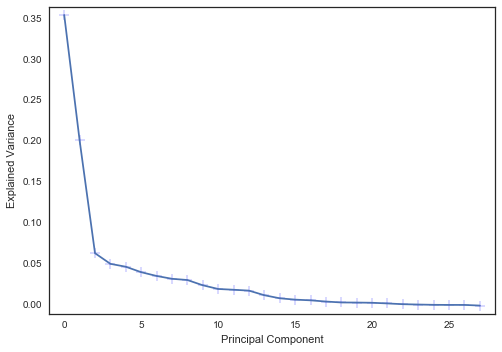

In [252]:
plt.plot(normalized_var)

plt.scatter(x = range(len(normalized_var)),
    y = normalized_var,
    marker = '+',
    s = 100)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(-1, len(normalized_var))
plt.ylim(-.01, max(normalized_var) + .01)

In [253]:
cumulated_normalized_var = np.cumsum(normalized_var)

In [254]:
cumulated_normalized_var

array([ 0.35442788,  0.55594516,  0.61981817,  0.67072226,  0.71808573,
        0.7588024 ,  0.79491092,  0.82756455,  0.85873656,  0.88349087,
        0.90371388,  0.92300424,  0.94122539,  0.95383586,  0.96269835,
        0.96992757,  0.97629589,  0.98120967,  0.98497314,  0.98863349,
        0.99204474,  0.99462685,  0.99628728,  0.99754454,  0.99844027,
        0.99922512,  1.        ,  1.        ])

**We can also plot the cummulative sum of the variance explained by the 27 principle components.**

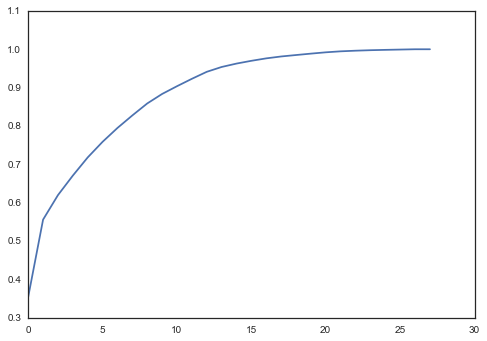

In [255]:
plt.plot(cumulated_normalized_var)

### We can pass the top `n` Principle Components back into a logistic regression model to see if that improves anything:

In [256]:
#Here I tried everything from 3 up to 27. Seems the benefit is lost after about 15 components
pca = decomposition.PCA(n_components = 15).fit(train_X)

X_pca_train = pd.DataFrame(pca.transform(train_X))
X_pca_test = pca.transform(test_X)

train_X_pca = pd.concat([train_X.reset_index(drop = True),pd.DataFrame(pca.transform(train_X))], axis=1)
test_X_pca = pd.concat([test_X.reset_index(drop = True),pd.DataFrame(pca.transform(test_X))], axis=1)

In [257]:
model_pca = linear_model.LogisticRegression(class_weight='balanced').fit(X_pca_train, train_c.reset_index(drop = True))

coefficients_pca = pd.concat([pd.DataFrame(X_pca_train.columns),pd.DataFrame(np.transpose(model_pca.coef_)),pd.DataFrame(np.transpose(np.exp(model_pca.coef_)))], axis = 1)
coefficients_pca.columns = ['Feature','Coefficient','Odds Ratio']
coefficients_pca.sort_values(by = "Odds Ratio", ascending = False).set_index('Feature')

,Coefficient,Odds Ratio
Feature,,
12,0.376977,1.457871
2,0.223556,1.250516
3,0.118629,1.125952
8,0.099891,1.105051
13,0.053212,1.054654
7,0.046347,1.047438
9,0.039495,1.040285
4,0.011333,1.011398
1,-0.001186,0.998815


In [258]:
print "My training score is", model_pca.score(X_pca_train, train_c.reset_index(drop = True))
print "My generalization score is", model_pca.score(X_pca_test, test_c.reset_index(drop = True))

My training score is 0.588979673177
My generalization score is 0.598406936882


**Looks like the model score is actually worse the the sklearn logit model from before**

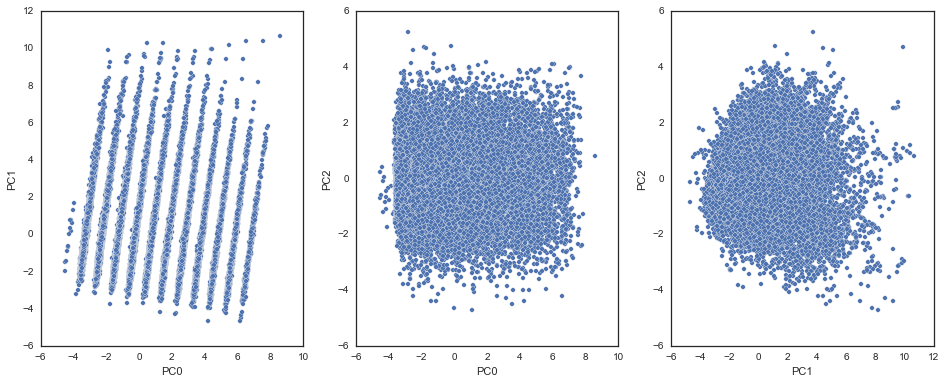

In [259]:
#PCA Plots (3 components)
pca3 = decomposition.PCA(n_components = 3).fit(train_X)
X = pca3.transform(train_X)
X = pd.DataFrame({'PC0': X.T[0], 'PC1': X.T[1], 'PC2': X.T[2]})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', ax = axes[2])

## k-Means

**Looks like the k-Means algorithm does not reveal anything new about the PCA data**

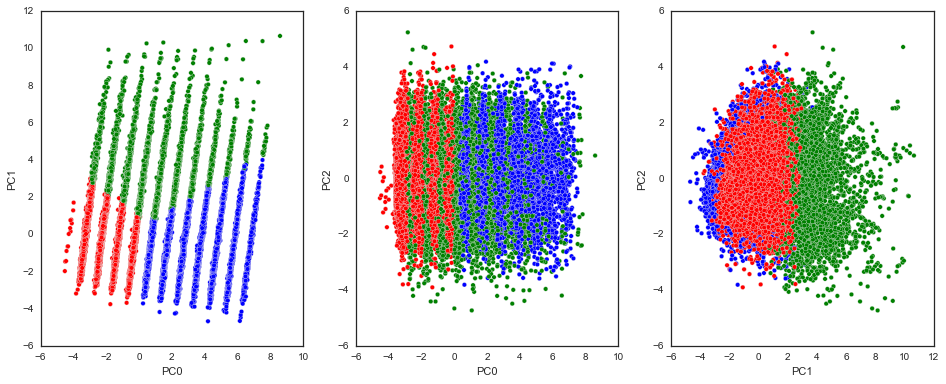

In [260]:
model = cluster.KMeans(n_clusters = 3, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'red', 1: 'green', 2: 'blue'})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', c = color, ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', c = color, ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', c = color, ax = axes[2])

<h2 style="color:#03363D">Random Forest</h2>

In [261]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

clf = RandomForestClassifier(n_estimators=500)
clf.fit(train_X, train_c)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Random Forest Model Score**

In [262]:
print "My training score is", clf.score(train_X, train_c)
print "My generalization score is", clf.score(test_X, test_c)

My training score is 1.0
My generalization score is 0.970608993749


In [263]:
model_selection.cross_val_score(clf, train_X, train_c, cv = 10).mean()

0.97419295248265025

## Confusion Matrix `random_forest`

In [264]:
clf_predicted_class = clf.predict(train_X)
clf_probabilities = clf.predict_proba(train_X)

In [265]:
pd.crosstab(clf_predicted_class,
    train_c,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0,29332,0
1,0,776


In [266]:
clf_predicted_class_test = clf.predict(test_X)
clf_probabilities_test = clf.predict_proba(test_X)

In [267]:
pd.crosstab(clf_predicted_class_test,
    test_c,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0,19253,583


**Looks like the random forest classification model learned that guessing "No" all the time was the way to go. Which actually means that it is just as useful as the unbalanced logistic regression model :(**

### Splitting train and test data into stratisfied groups (keeping same proportion of win vs loss)

In [268]:
dfcopy2 = dfcopy
ns = dfcopy2.upgraded_boolean.value_counts()
ns

0    48585
1     1359
Name: upgraded_boolean, dtype: int64

In [269]:
for upgrade in [0,1]:
    n = ns[upgrade] - ns.min()
    index = dfcopy2[dfcopy2.upgraded_boolean == upgrade].sample(n = n, random_state = 0).index
    dfcopy2.drop(index, inplace = True)

In [270]:
dfcopy2.upgraded_boolean.value_counts()

1    1359
0    1359
Name: upgraded_boolean, dtype: int64

In [271]:
X = dfcopy2.drop(['upgraded_boolean','account_id'], axis=1)
c = dfcopy2.upgraded_boolean

train_X_strat, test_X_strat, train_c_strat, test_c_strat = model_selection.train_test_split(X, c, stratify = c, train_size = .6, random_state = 0)

In [272]:
test_c_strat.value_counts()

1    544
0    544
Name: upgraded_boolean, dtype: int64

## Re-run the random forest on the stratified data

In [273]:
clf_strat = RandomForestClassifier(n_estimators=500)
clf_strat.fit(train_X_strat, train_c_strat)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
print "My training score is", clf_strat.score(train_X_strat, train_c_strat)
print "My generalization score is", clf_strat.score(test_X_strat, test_c_strat)

My training score is 1.0
My generalization score is 0.666360294118


In [275]:
clf_strat_predicted_class = clf_strat.predict(train_X_strat)
clf_strat_probabilities = clf_strat.predict_proba(train_X_strat)

In [276]:
pd.crosstab(clf_strat_predicted_class,
    train_c_strat,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0,815,0
1,0,815


In [280]:
clf_strat_predicted_class_test = clf_strat.predict(test_X_strat)
clf_strat_probabilities_test = clf_strat.predict_proba(test_X_strat)

In [281]:
pd.crosstab(clf_strat_predicted_class_test,
    test_c_strat,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0,335,154
1,209,390


### Feature Importance

In [277]:
feature_importances = sorted(zip(clf_strat.feature_importances_, train_X_strat.columns), reverse = True)

feature_importances

[(0.13214146741675489, '%change_num_tix_solved'),
 (0.12517780601365205, 'num_tix_solved'),
 (0.10785063548931376, 'num_tags'),
 (0.076005455494505603, 'age_in_months'),
 (0.067044592144888768, 'num_trig'),
 (0.062413902443621952, 'num_agents'),
 (0.056455381265343392, 'num_macros'),
 (0.04312596056563528, 'num_orgs'),
 (0.040331072983822477, 'num_fields'),
 (0.038923621875112217, 'num_apps'),
 (0.037309407713139453, 'num_groups'),
 (0.033161961888430222, 'Professional'),
 (0.027609015905884587, 'num_automations'),
 (0.020255763787979403, 'enabled_widget'),
 (0.019507780513086239, 'Team'),
 (0.019344509501674597, 'enabled_HC'),
 (0.018537759321258413, 'enabled_community'),
 (0.015554846448008976, 'enabled_talk'),
 (0.015235212287803687, 'enabled_hours'),
 (0.014083890431834894, 'enabled_HCcode'),
 (0.0069861425552876595, 'enabled_insights'),
 (0.0066989661053269136, 'Starter'),
 (0.0059361947139665219, 'enabled_csat'),
 (0.0041920004457949387, 'Plus'),
 (0.0028389439330698449, 'Regular

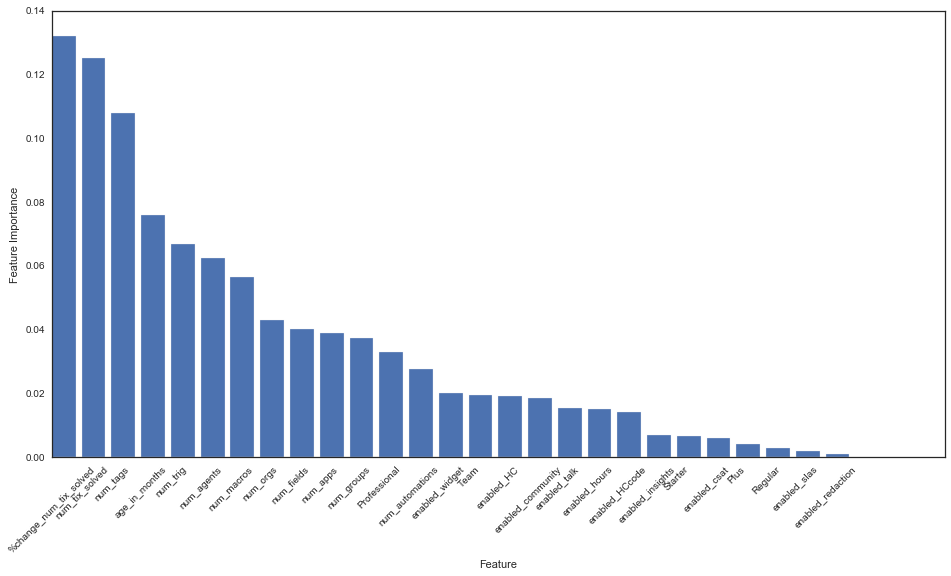

In [278]:
plt.figure(figsize = (16, 8))

plt.bar(
    range(len(feature_importances)),
    [feature_importance[0] for feature_importance in feature_importances]
)

plt.xticks(
    range(len(feature_importances)),
    [feature_importance[1] for feature_importance in feature_importances],
    rotation = 45
)

plt.xlabel('Feature')
plt.ylabel('Feature Importance')